<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <img src="images/Xlogo.png" alt="Transposition of a vector" title="Vector transposition" width="115" style="float: left;">
  <p style=" text-align: center; font-size: 32px;">   
   <strong> Fractional and Volterra processes in Finance  </strong></p>
  <p style=" text-align: center; font-size: 25px;"><strong> Challenge 1 -  Simulation of Gaussian Volterra processes </strong></p>
  <p style=" text-align: center; font-size: 20px;"> Eduardo Abi Jaber </p>
</header>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> Challenge : Unlock the potential of Gaussian fractional processes and pave the way for more accurate simulations! </strong></p>

# <font color='red'>PLEASE ENTER YOUR FULL NAMES HERE:</font>

- Renaud POUH
- Philippe YAO

<font color='red'>**DEADLINE: 30 January before 10 AM to be sent by email to eduardo.abi-jaber@polytechnique.edu**</font>

The aim of the challenge is to figure out ways to efficiently simulate the Riemann-Liouville fractional Brownian motion:
$$  X_t = \nu  \int_0^t  K(t,s) dW_s, $$
with
$$ K(t,s) = \frac{1}{\Gamma(H + 1/2)} (t - s)^{H-1/2} 1_{s<t}$$
and $H<1/2$.

The covariance kernel of $X$ is given in the following closed form
\begin{align}
\Sigma_0(s,u)&=\frac{\nu^2}{\Gamma(H+1/2)^2}\int_0^{s\wedge u} (s-z)^{H-1/2}(u-z)^{H-1/2}dz\\
&=\frac{\nu^2}{\Gamma(\alpha)\Gamma(1+\alpha)}\frac{s^{\alpha}}{u^{1-\alpha}} \; {}_{2}F_{1}\left( 1, 1-\alpha; 1+\alpha ; \frac s u\right)
\end{align}
where $\alpha=H+1/2$ and  ${}_{2}F_{1}$ is the Gaussian hypergeometric function.

**Guidelines**
- Implement and briefly explain and comment the methods. We are interested in low regimes of $H$. Plot the sample paths on same gaussian increments, to compare paths by paths. You can take $T=1.$ and $n_{steps}=300$ time steps uniformly spaced on $[0,T]$. (set $\nu=1$).  
- Two metrics : running time (using "timeit) to simulate one trajectory and MSE error of the paths wrt to the exact path simulated using cholesky method:
$$MSE = \sqrt{\frac 1 {n_{steps}} \sum_{i=1}^{n_{steps}} \left(X^{\mbox{method}}_{t_i} - X^{\mbox{cholesky}}_{t_i}\right)^2 }   $$


**Question:** Detail the computations that lead to the covariance kernel. Is it valid for $H\leq 1/2$, $H\geq 1/2$? both?

**Answer:**

 ###  Dérivation du noyau de covariance  $\Sigma_0(s, u)$

La définition du processus de Riemann-Liouville fractional Brownian motion est donnée par :  
$
X_t = \nu \int_0^t K(t,s) \, dW_s,
$
où le noyau $K(t, s)$ est défini par :
$
K(t,s) = \frac{1}{\Gamma(H + 1/2)} (t - s)^{H-1/2} \, 1_{s<t}.
$

Le noyau de covariance $\Sigma_0(s, u)$ pour deux temps $s, u$ est calculé en prenant l'espérance des produits croisés des intégrales stochastiques associées :
$
\Sigma_0(s, u) = \mathbb{E}[X_s X_u] = \nu^2 \int_0^{s \wedge u} K(s, z) K(u, z) \, dz.
$

Substituant $K(s, z)$ et $K(u, z)$, on obtient :
$
\Sigma_0(s, u) = \frac{\nu^2}{\Gamma(H+1/2)^2} \int_0^{s \wedge u} (s-z)^{H-1/2} (u-z)^{H-1/2} \, dz.
$

###  Évaluation de l'intégrale

En posant $\alpha = H + 1/2$, l'expression finale est donnée par :
$
\Sigma_0(s, u) = \frac{\nu^2}{\Gamma(\alpha) \Gamma(1+\alpha)} \frac{s^\alpha}{u^{1-\alpha}} \; {}_2F_1\left(1, 1-\alpha; 1+\alpha; \frac{s}{u}\right),
$
où ${}_2F_1$ est la fonction hypergéométrique gaussienne.

###  Validité de $\Sigma_0(s, u)$ pour $H \leq 1/2$ et $H \geq 1/2$

#### Cas $H < 1/2$
- Lorsque $H < 1/2$, $(t-s)^{H-1/2}$ devient une puissance négative mais reste intégrable pour $s < t$.
- $\Sigma_0(s, u)$ est donc bien défini.

#### Cas $H \geq 1/2$
- Lorsque $H \geq 1/2$, $(t-s)^{H-1/2}$ devient une puissance positive ou nulle. Dans ce cas, $\Sigma_0(s, u)$ est défini.
- La transition pour $H = 1/2$ correspond au mouvement brownien standard, où le noyau devient constant.


Several options and suggestions detailed below:
- Cholesky
- Different Euler schemes
- multifactor euler vs exact (cholesky on factors)


<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">1. Exact simulation using Cholesky</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> Warm up with Cholesky, but aim to set the simulation field on fire with your efficient methods for Gaussian fractional processes. </strong></p>

The ${}_{2}F_{1}$ Gaussian hypergeometric function can be implemented using  scipy `sc.hyp2f1`, pay close attention to the parameters, notably final parameter needs to be less than 1?

**Question:** Check the doc https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.hyp2f1.html and explain.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sc
from scipy.special import gamma, gammainc, hyp2f1
from scipy.integrate import quad
import timeit
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from functools import partial


Temps d'exécution pour Cholesky avec = 0.1: 0.373957 secondes par exécution
Temps d'exécution pour Cholesky avec = 0.5: 0.039487 secondes par exécution
Temps d'exécution pour Cholesky avec = 0.9: 0.225737 secondes par exécution


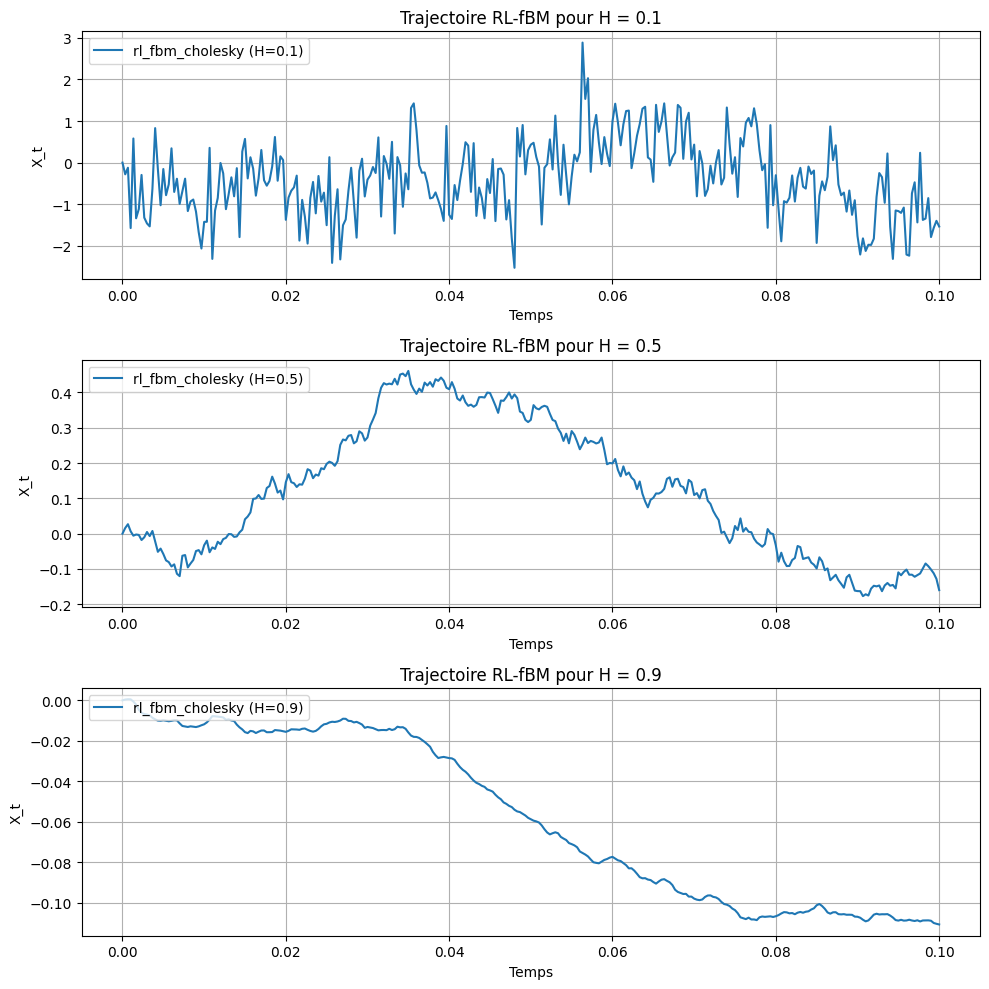

In [ ]:
def calculer_covariance_rl_fbm(alpha, t_vec, constante_normalisation):
    t_mat = np.outer(t_vec, np.ones_like(t_vec))
    s_mat = t_mat.T
    min_ts = np.minimum(t_mat, s_mat)
    max_ts = np.maximum(t_mat, s_mat)
    matrice_cov = constante_normalisation * (min_ts ** alpha) / (max_ts ** (1 - alpha)) * hyp2f1(1, 1 - alpha, 1 + alpha, min_ts / max_ts)
    return matrice_cov

def simuler_rl_fbm_cholesky(H, T, n_steps,Z, nu=1):
    alpha = H + 0.5
    constante_normalisation = nu**2 / (gamma(alpha) * gamma(alpha + 1))
    dt = T / n_steps
    t_vec = np.linspace(dt, T, n_steps)

    matrice_cov = calculer_covariance_rl_fbm(alpha, t_vec, constante_normalisation)
    L = np.linalg.cholesky(matrice_cov)
    vecteur_norm = Z
    chemin_fbm = L @ vecteur_norm

    return np.concatenate((np.array([0]), chemin_fbm)),  np.concatenate((np.array([0]),t_vec))

# Initialisation
np.random.seed(2)
T = 0.1
n_steps = 300
H_values = [0.1,  0.5,0.9]  # Pour inclure des petits et grands H
rng = np.random.default_rng(3)
Z = rng.standard_normal(n_steps)

# Création des trajectoires et tracé
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
for i, H in enumerate(H_values):
    Z = np.random.normal(0, 1, n_steps)

    path_fbm, time_vect = simuler_rl_fbm_cholesky(H, T, n_steps,Z,nu=1)  # Simulation pour chaque H

    execution_time = timeit.timeit(lambda: simuler_rl_fbm_cholesky(H, T, n_steps, Z,nu=1), number=10)  # 10 répétitions
    print(f"Temps d'exécution pour Cholesky avec = {H}: {execution_time / 10:.6f} secondes par exécution")


    axes[i].plot(time_vect, path_fbm, label=f'rl_fbm_cholesky (H={H})')
    axes[i].legend(loc='upper left')
    axes[i].set_title(f'Trajectoire RL-fBM pour H = {H}')
    axes[i].set_xlabel('Temps')
    axes[i].set_ylabel('X_t')
    axes[i].grid(True)


# Ajustement de l'affichage
plt.tight_layout()
plt.show()



On remarque que plus l'indice de Hurst H est petit, plus il y a de la rugosité dans la trajectoire du processus.


<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">2. Euler Schemes</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> Explore the unknown and discover the hidden potential of Euler methods through a performance evaluation. </strong></p>

We will consider three (modified) Euler schemes after writing
$$ X_{t_i} = X_0 + \sum_{j=1}^i \underbrace{\int_{t_{j-1}}^{t_j} K(t_i,s) dW_s}_{Y^{i}_j}. $$

1. **EULER 1** Naive: $$ X_{t_i} = X_0 + \nu \sqrt{dt}\sum_{j=1}^i K(t_i,t_{j-1}) Z_j $$
with $Z_j \sim \mathcal N(0,1)$ iid.

2. **EULER 2** Write $dW_s \approx Z_j \frac{ds}{\sqrt{dt}}$ so that
$$ X_{t_i} = X_0 + \nu \sum_{j=1}^i w_j^i Z_j $$
with
$$ w_j^i =   \frac{1}{\sqrt{dt}}\int_{t_{j-1}}^{t_j} K(t_i,s) ds =  \int_{t_{j-1}}^{t_j} K(t_i,s) ds  =   \frac{1}{\sqrt{dt}} \frac{1}{\Gamma(H + 0.5)(H + 0.5)} \left( (t_i - t_{j-1})^{H+0.5} - (t_i - t_{j})^{H+0.5} \right)$$
3. **EULER 3** Observe that $(Y^i_1, \ldots, Y^i_i)$ is a centered Gaussian vector with independent components such that the std of the j-th component is
$$  \tilde w^i_j = \sqrt{\int_{t_{j-1}}^{t_j} K(t_i,s)^2 ds} = \frac{1}{\Gamma(H + 0.5)} \sqrt{\frac{\left( (t_i - t_{j-1})^{2H} - (t_i - t_{j})^{2H} \right)}{2H}}$$
so that we use
$$ X_{t_i} \approx X_0 + \nu \sum_{j=1}^i    \tilde w^i_j Z_j.$$
Note that the simulation is not exact since $$\mathbb E[Y_j^i Y_{j'}^{i'} ] = \int_{t_{j-1}}^{t_j} K(t_i, s) K(t_{i'},s) ds 1_{j=j'} $$,  whereas in the approximation $\mathbb E[\tilde Y_j^i \tilde Y_{j'}^{i'} ] = w^{i}_j w^{i'}_j $. ($\fbox{to double check}$)


$\textbf{Reference}$: Rambaldi, S., & Pinazza, O. (1994). An accurate fractional Brownian motion generator. Physica A: Statistical Mechanics and its Applications, 208(1), 21-30.


Compare on graphs + MSE that the Naive Euler scheme is way off for small values of $H<0.05$. Works fine for bigger values of $H>0.3$... etc...

**(!)** Please stick to the names **EULER 1**, **EULER 2**, **EULER 3**.

Example of expected graph for sample path:



<img src="images/pathsex.png" alt="Transposition of a vector" title="Vector transposition" width="400">



On remarque que pour des valeurs de H très petites de l'ordre de $H=0.05$, le schéma 3 s'ajuste moins bien. \\
Autour de $H=0.1$, c'est le schéma 1 qui est moins précis. \\
Au-delà de $H=0.3$, les 3 schémas se valent et s'écartent tous de la méthode de référence de Cholesky.


In [ ]:
# Schéma EULER 1
def euler_1(H, T, n_steps,Z, nu=1):
    dt = T / n_steps
    t_vec = np.linspace(dt, T, n_steps+1)
    X = np.zeros(n_steps+1)
    alpha = H + 0.5
    for i in range(1,n_steps+1):
        X[i] = np.sum([(t_vec[i] - t_vec[j-1])**(H - 0.5) * Z[j] for j in range(1,i)]) * np.sqrt(dt)*nu
    return X

# Schéma EULER 2
def euler_2(H, T, n_steps,Z,nu=1 ):
    dt = T / n_steps
    t_vec = np.linspace(dt, T, n_steps+1)
    X = np.zeros(n_steps+1)
    alpha = H + 0.5
    for i in range(1,n_steps+1):
        weights = [(1 / np.sqrt(dt)) * (1 / (gamma(alpha) * alpha)) *
                   ((t_vec[i] - t_vec[j-1])**alpha - (t_vec[i] - t_vec[j])**alpha) for j in range(1, i + 1)]
        X[i] = np.sum([weights[j] * Z[j] for j in range(i)])*nu
    return X

# Schéma EULER 3
def euler_3(H, T, n_steps, Z, nu=1):
    dt = T / n_steps
    t_vec = np.linspace(dt, T, n_steps+1)
    X = np.zeros(n_steps+1)
    alpha = H + 0.5
    for i in range(1,n_steps+1):
        weights = [(1 / (gamma(alpha))) * np.sqrt(((t_vec[i] - t_vec[j-1])**(2 * H) - (t_vec[i] - t_vec[j])**(2 * H)) / (2 * H)) for j in range(1, i + 1)]
        X[i] = np.sum([weights[j] * Z[j] for j in range(i)])*nu
    return  X


In [ ]:
def compute_mse(x,y):
  return np.mean((x-y)**2)

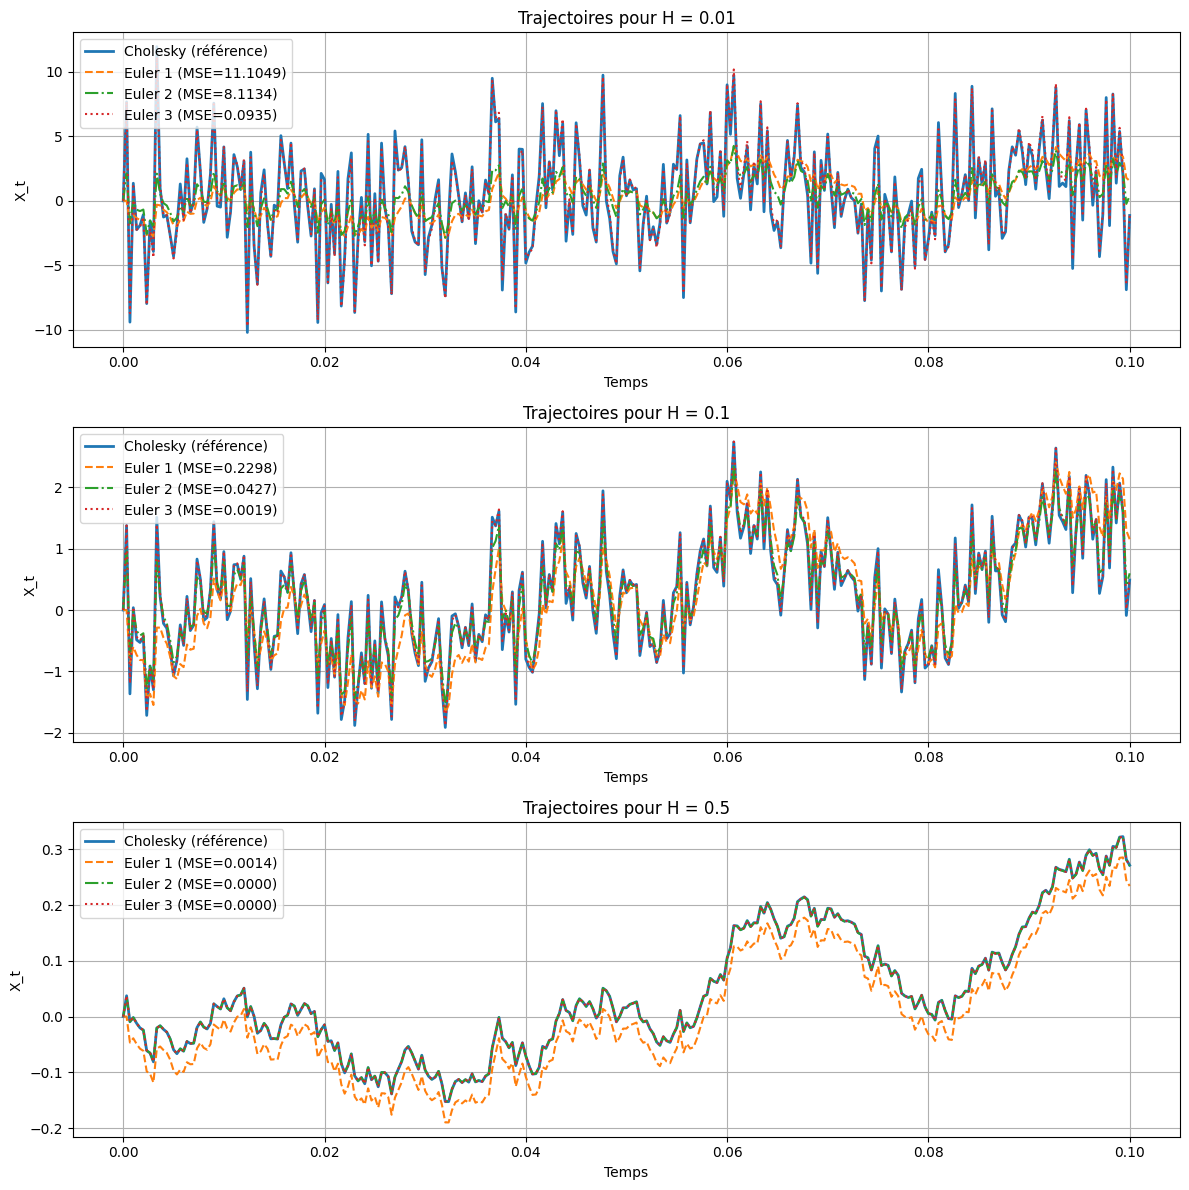


=== Résultats des MSE ===
H          Euler 1    Euler 2    Euler 3   
----------------------------------------
0.01       11.104894 8.113398 0.093472
0.1        0.229788 0.042690 0.001891
0.5        0.001384 0.000000 0.000000

=== Temps d'exécution (secondes) ===
H          Cholesky   Euler 1    Euler 2    Euler 3   
--------------------------------------------------
0.01       0.301315 0.080134 0.640920 0.148758
0.1        0.102614 0.035216 0.150385 0.140003
0.5        0.005933 0.034194 0.148210 0.254224


In [ ]:
# Paramètres
T = 0.1
n_steps = 300
H_values = [0.01, 0.1, 0.5]  # Pour inclure des petits et grands H
rng = np.random.default_rng(3)
Z = rng.standard_normal(n_steps)

# Initialisation des résultats
mse_results = {}
execution_times = {}

# Création des graphiques
fig, axes = plt.subplots(len(H_values), 1, figsize=(12, 12))

for idx, H in enumerate(H_values):
    # Mesure du temps et simulation pour Cholesky
    execution_time_cholesky = timeit.timeit(lambda: simuler_rl_fbm_cholesky(H, T, n_steps, Z, nu=1), number=10) / 10
    cholesky_path, time = simuler_rl_fbm_cholesky(H, T, n_steps, Z, nu=1)

    # Mesure du temps et simulation pour Euler 1
    execution_time_euler1 = timeit.timeit(lambda: euler_1(H, T, n_steps, Z, nu=1), number=10) / 10
    euler1_path = euler_1(H, T, n_steps, Z, nu=1)

    # Mesure du temps et simulation pour Euler 2
    execution_time_euler2 = timeit.timeit(lambda: euler_2(H, T, n_steps, Z, nu=1), number=10) / 10
    euler2_path = euler_2(H, T, n_steps, Z, nu=1)

    # Mesure du temps et simulation pour Euler 3
    execution_time_euler3 = timeit.timeit(lambda: euler_3(H, T, n_steps, Z, nu=1), number=10) / 10
    euler3_path = euler_3(H, T, n_steps, Z, nu=1)

    # Calcul des MSE
    mse_euler1 = compute_mse(cholesky_path, euler1_path)
    mse_euler2 = compute_mse(cholesky_path, euler2_path)
    mse_euler3 = compute_mse(cholesky_path, euler3_path)

    # Stockage des résultats
    mse_results[H] = {
        'Euler 1': mse_euler1,
        'Euler 2': mse_euler2,
        'Euler 3': mse_euler3
    }
    execution_times[H] = {
        'Cholesky': execution_time_cholesky,
        'Euler 1': execution_time_euler1,
        'Euler 2': execution_time_euler2,
        'Euler 3': execution_time_euler3
    }

    # Tracé des trajectoires
    axes[idx].plot(time, cholesky_path, label='Cholesky (référence)', linewidth=2)
    axes[idx].plot(time, euler1_path, label=f'Euler 1 (MSE={mse_euler1:.4f})', linestyle='--')
    axes[idx].plot(time, euler2_path, label=f'Euler 2 (MSE={mse_euler2:.4f})', linestyle='-.')
    axes[idx].plot(time, euler3_path, label=f'Euler 3 (MSE={mse_euler3:.4f})', linestyle=':')
    axes[idx].set_title(f'Trajectoires pour H = {H}')
    axes[idx].set_xlabel('Temps')
    axes[idx].set_ylabel('X_t')
    axes[idx].legend(loc='upper left')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

# Affichage des résultats MSE sous forme de tableau
print("\n=== Résultats des MSE ===")
print("{:<10} {:<10} {:<10} {:<10}".format("H", "Euler 1", "Euler 2", "Euler 3"))
print("-" * 40)
for H, mse in mse_results.items():
    print(f"{H:<10} {mse['Euler 1']:.6f} {mse['Euler 2']:.6f} {mse['Euler 3']:.6f}")

# Affichage des temps d'exécution sous forme de tableau
print("\n=== Temps d'exécution (secondes) ===")
print("{:<10} {:<10} {:<10} {:<10} {:<10}".format("H", "Cholesky", "Euler 1", "Euler 2", "Euler 3"))
print("-" * 50)
for H, times in execution_times.items():
    print(f"{H:<10} {times['Cholesky']:.6f} {times['Euler 1']:.6f} {times['Euler 2']:.6f} {times['Euler 3']:.6f}")

On remarque que plus la valeur de H diminue, moins les schémas sont précis. Toutefois, il faut noter que le schéma 3 est le plus précis et le schéma 1 le moins précis.

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">3. Multifactor approximations</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> Embrace the challenge, and push the boundaries of what's possible by making non-standard multifactor approximations work effectively. </strong></p>



Based on
- Abi Jaber, E., & El Euch, O. (2019). Multifactor approximation of rough volatility models. SIAM Journal on Financial Mathematics, 10(2), 309-349. https://arxiv.org/abs/1801.10359
- Abi Jaber, E. (2019). Lifting the Heston model. Quantitative Finance, 19(12), 1995-2013. https://arxiv.org/abs/1810.04868

$$ X_t \approx X_0 + \nu \sum_{k=1}^n  c_k Y^{k}_t$$
with $$  Y^k_t = \int_0^t e^{-x_k(t-s)}dW_s$$
$$  Y^k_{t_i} = e^{-x_k h} Y^k_t + \xi_i^k , \quad \xi_i^k = \int_{t_{i-1}}^{t_i}e^{-x_k(t_i-s)}dW_s$$
with the parametrization:

    
$$ c^n_i = \frac{(r_n^{(1-\alpha)}-1) r_n^{(\alpha-1)(1+n/2)}}{\Gamma(\alpha)\Gamma(1-\alpha)(1-\alpha)}r_n^{(1-\alpha)i},  \quad  x^n_i = \frac {1-\alpha}{2-\alpha} \frac{r_n^{2-\alpha}-1}{r_n^{1-\alpha}-1} r_n^{i-1-n/2},$$
		where $\alpha:=H+1/2$, with a geometric repartition $\eta^n_i=r_n^i$ for some $r_n$ such that
		$  r_n \downarrow 1 \quad \mbox{and} \quad n \ln r_n \to \infty, \quad \mbox{as } n \to \infty.$
</div>
We denote by
$$ K_n(t) = \sum_{i=1}^n c_i e^{-x_i t}. $$

The first step is to determine a good value or $r_n$ for a choice of $n$, $H$ and $T$.  For this, for a given $H,n,T$,  we can choose $r_n$ to minimize
$$ \int_0^T |K_n(t)-K(t)|^2 dt $$

**Question:** Develop the expression (by developing the square) and show that it admits an explicit expression in terms of incomplete gamma function. Write a minimization function to find r and sanity check with the following table ($H=0.1$, $T=0.5$)

<img src="images/tablr.png" alt="Transposition of a vector" title="Vector transposition" width="400">


**Answer:**\\

### Minimisation de l'erreur quadratique pour $K_n(t)$

Nous cherchons à minimiser l'erreur quadratique suivante :
$$
\int_0^T \left| K_n(t) - K(t) \right|^2 dt,
$$
où
$$
K_n(t) = \sum_{i=1}^n c_i e^{-x_i t}, \quad K(t) = \frac{t^{H-1/2}}{\Gamma(H+1/2)}.
$$

En développant le carré, on obtient :
$$
\int_0^T \left| K_n(t) - K(t) \right|^2 dt =
\int_0^T \left( \sum_{i=1}^n c_i e^{-x_i t} \right)^2 dt
- 2 \int_0^T \left( \sum_{i=1}^n c_i e^{-x_i t} \cdot \frac{t^{H-1/2}}{\Gamma(H+1/2)} \right) dt
+ \int_0^T \frac{t^{2(H-1/2)}}{\Gamma^2(H+1/2)} dt.
$$

### 1. Premier terme
En développant le carré de la somme :
$$
\left( \sum_{i=1}^n c_i e^{-x_i t} \right)^2 = \sum_{i=1}^n c_i^2 e^{-2x_i t}
+ 2 \sum_{1 \leq i < j \leq n} c_i c_j e^{-(x_i + x_j)t}.
$$
En intégrant :
$$
\int_0^T \left( \sum_{i=1}^n c_i e^{-x_i t} \right)^2 dt =
\sum_{i=1}^n c_i^2 \frac{1 - e^{-2x_i T}}{2x_i}
+ 2 \sum_{1 \leq i < j \leq n} c_i c_j \frac{1 - e^{-(x_i + x_j)T}}{x_i + x_j}.
$$

### 2. Deuxième terme
$$
-2 \int_0^T \sum_{i=1}^n c_i e^{-x_i t} \cdot \frac{t^{H-1/2}}{\Gamma(H+1/2)} dt
= -2 \sum_{i=1}^n \frac{c_i}{\Gamma(H+1/2)} \int_0^T e^{-x_i t} t^{H-1/2} dt.
$$
L'intégrale est donnée par la fonction gamma incomplète :
$$
\int_0^T e^{-x_i t} t^{H-1/2} dt = x_i^{-(H+1/2)} \gamma(H+1/2, x_i T),
$$
où $\gamma(a, b)$ est la fonction gamma incomplète inférieure.

### 3. Troisième terme
$$
\int_0^T \frac{t^{2(H-1/2)}}{\Gamma^2(H+1/2)} dt =
\frac{T^{2H}}{(2H)\Gamma^2(H+1/2)}.
$$

### Expression complète
En combinant les trois termes, l'erreur quadratique devient :
$$
\int_0^T \left| K_n(t) - K(t) \right|^2 dt =
\sum_{i=1}^n c_i^2 \frac{1 - e^{-2x_i T}}{2x_i}
+ 2 \sum_{1 \leq i < j \leq n} c_i c_j \frac{1 - e^{-(x_i + x_j)T}}{x_i + x_j}
- 2 \sum_{i=1}^n \frac{c_i}{\Gamma(H+1/2)} x_i^{-(H+1/2)} \gamma(H+1/2, x_i T)
+ \frac{T^{2H}}{(2H)\Gamma^2(H+1/2)}.
$$

### Étape de minimisation
Nous minimisons cette expression par rapport à $r_n$ pour un choix donné de $H$, $T$ et $n$.


On commence par définir des fonctions pour les noyaux $K$ et $K_n$.

In [ ]:

def K(t, H):
  alpha=H + 0.5
  return (t)**(alpha - 1) / gamma(alpha)

def K_n(t, H, r_n):
  alpha=H + 0.5
  c_n = [(r_n**(1-alpha) - 1) * r_n**((alpha-1)*(1+n/2)) * r_n**((1-alpha)*i) /
          (gamma(alpha) * gamma(1-alpha) * (1-alpha))
          for i in range(1, n+1)]
  x_n = [(1-alpha) * (r_n**(2-alpha)-1) * r_n**(i-1-n/2) / ((2-alpha) *
          (r_n**(1-alpha)-1)) for i in range(1, n+1)]
  return sum(c * np.exp(-x * t) for c, x in zip(c_n, x_n))

def loss_function(r_n,T, H, n):
  alpha=H + 0.5



  c_n = [
      (r_n**(1-alpha) - 1) * r_n**((alpha-1)*(1 + n/2)) * r_n**((1-alpha)*i) /
      (gamma(alpha) * gamma(1-alpha) * (1-alpha))
      for i in range(1, n+1)
  ]
  x_n = [
      (1-alpha) * (r_n**(2-alpha) - 1) * r_n**(i-1-n/2) /
      ((2-alpha) * (r_n**(1-alpha) - 1))
      for i in range(1, n+1)]

  # Calcul des termes de l'expression finale
  e1 = sum(c_n[i]**2 * (1-np.exp(-2 * x_n[i] * T)) / (2 * x_n[i]) for i in range(n)) + 2*sum( c_n[i] * c_n[j] * (1- np.exp(-(x_n[i] + x_n[j]) * T)) / (x_n[i] + x_n[j])
          for i in range(n) for j in range(i+1, n))
  e2 = -2*sum(c_n[i] * gammainc(H + 0.5, x_n[i] * T)/ ( x_n[i]**(H+0.5)) for i in range(n))
  e3 = T**(2 * H) / (2 * H * (gamma(H + 0.5))**2)

  # Calcul de l'expression finale
  result = e1+e2+e3

  return result

### Fonction de minimisation

La fonction d'optimisation prend en argument l'indice $H$, la durée $T$, le nombre $n$ d'instants de discrétisation entre $0$ et $T$ ainsi qu'une valeur initiale pour $r_0$.

In [ ]:
def optimal_rn(H, T, n, r_0=10):

  # Fixer les autres paramètres de la fonction
  loss_func_fixed = partial(loss_function, T=T, H=H, n=n)


  # Optimisation avec l'algorithme Nelder-Mead

  result = minimize(loss_func_fixed, x0=[r_0], method='Nelder-Mead',  tol=1e-10)

  return result.x, result.fun


H,T, r_0 =0.1, 0.5, 60

alpha= H + 0.5
data=[]
for n in [4, 10, 20, 40, 200, 300]:
    rn_opt, norm_n2 = optimal_rn(H, T, n, r_0)
    data.append([n, rn_opt, norm_n2])

# Création du DataFrame pandas
df = pd.DataFrame(data, columns=['n', 'r_n', 'norm_n^2'])

df

<ipython-input-7-d0f8f9499e4c>:20: RuntimeWarning: invalid value encountered in power
  (r_n**(1-alpha) - 1) * r_n**((alpha-1)*(1 + n/2)) * r_n**((1-alpha)*i) /
<ipython-input-7-d0f8f9499e4c>:25: RuntimeWarning: invalid value encountered in power
  (1-alpha) * (r_n**(2-alpha) - 1) * r_n**(i-1-n/2) /
<ipython-input-7-d0f8f9499e4c>:26: RuntimeWarning: invalid value encountered in power
  ((2-alpha) * (r_n**(1-alpha) - 1))
<ipython-input-7-d0f8f9499e4c>:20: RuntimeWarning: divide by zero encountered in power
  (r_n**(1-alpha) - 1) * r_n**((alpha-1)*(1 + n/2)) * r_n**((1-alpha)*i) /
<ipython-input-7-d0f8f9499e4c>:20: RuntimeWarning: invalid value encountered in multiply
  (r_n**(1-alpha) - 1) * r_n**((alpha-1)*(1 + n/2)) * r_n**((1-alpha)*i) /
<ipython-input-7-d0f8f9499e4c>:25: RuntimeWarning: divide by zero encountered in power
  (1-alpha) * (r_n**(2-alpha) - 1) * r_n**(i-1-n/2) /
<ipython-input-7-d0f8f9499e4c>:25: RuntimeWarning: divide by zero encountered in reciprocal
  (1-alpha) * (r_

,n,r_n,norm_n^2
0,4,[50.545806884765625],0.369929
1,10,[18.05483149905922],0.112480
2,20,[8.874971956014633],0.032524
3,40,[4.473679305519909],0.007567
4,200,[1.6946096392348409],0.000112
5,300,[1.4827902184333652],0.000034


In [ ]:
r_n=df['r_n'][1]

Now that we know how to determin $r$.

# Multifactor with Euler methods on factors


We will consider several Euler-type approximations for factors:
1. **Factor-Euler 1** :
$$ \xi_i^k \approx e^{-x_k dt} \sqrt{dt} Z_i $$
2.  **Factor-Euler 2**: writing $dW_s = Z_i ds / \sqrt{dt}$
$$ \xi_i^k \approx \frac{1}{\sqrt{dt}}   \int_{t_{i-1}}^{t_i}e^{-x_k(t_i-s)}ds = \frac{1}{\sqrt{dt}}  \frac{1-e^{-x_k dt}}{x_k}$$
3. **Factor-Euler 3** : using that $\xi^k_i$ is gaussian with variance $\frac{1 - e^{-2x_k h}}{2x_k} $, so that
$$\xi_i^k \approx \sqrt{\frac{1 - e^{-2x_k h}}{2x_k}} Z_i$$
4. **Factor-Euler 4** :: implicit scheme as in lifting heston paper in the appendix
5. **Factor-Euler 5** : modified variance:
$$  X_{t_{i+1}} = X_0 + \nu\sum_{k}  c_k e^{-x_k dt}Y^{k}_{t_i} + \nu \int_{t_i}^{t_{i+1}} K_n({t_{i+1},s}) dW_s$$
approximate second term by variance of original kernel $K$.


In [ ]:
# Function to compute coefficients c_k and x_k based on r_n
def compute_coefficients(H, n):
    r_n = optimal_rn(H, T, n, r_0=10)[0][0]
    alpha=H + 0.5
    c_n = [(r_n**(1-alpha) - 1) * r_n**((alpha-1)*(1+n/2)) * r_n**((1-alpha)*i) /
            (gamma(alpha) * gamma(1-alpha) * (1-alpha))
            for i in range(1, n+1)]
    x_n = [(1-alpha) * (r_n**(2-alpha)-1) * r_n**(i-1-n/2) / ((2-alpha) *
            (r_n**(1-alpha)-1)) for i in range(1, n+1)]
    return c_n, x_n



### Expression générale de $ X_t $ :
$$
X_{t_i} \approx X_{t_{i-1}} + \nu \sum_{k=1}^m c_k \left[ Y_{t_i}^k - Y_{t_{i-1}}^k \right]
$$


**Factor-Euler 1**  
$$
Y_{t_i}^k \approx e^{-x_k \Delta t} Y_{t_{i-1}}^k + e^{-x_k \, \Delta t} \sqrt{\Delta t} Z_i
$$
où $Z_i \sim \mathcal{N}(0, 1)$. sont des variables normales indépendantes.





In [ ]:
def Factor_Euler_1(H, n_factors,n_steps, T, Z, nu=1.0):
    """
    Simule le schéma Factor Euler 1.

    Arguments :
    H -- Exposant de Hurst (float)
    n -- Nombre de facteurs (int)
    r_n -- Paramètre de rééchelonnage (float)
    T -- Temps total de simulation (float)
    dt -- Pas de temps (float)
    nu -- Facteur multiplicatif pour les mises à jour de X (float)

    Retourne :
    time -- Tableau des points de temps
    X -- Processus simulé
    """


    r_n = float(optimal_rn(H, T, n_factors, r_0=10)[0][0])
    # Calcul des coefficients
    c_n, x_n = compute_coefficients(H, n_factors)
    # Initialisation
    dt=T/n_steps
    #time = np.arange(0, T, dt)  # Discrétisation temporelle
    Y = np.zeros((n_factors, n_steps+1))  # Facteurs Y
    X = np.zeros(n_steps+1)  # Processus X
    rng = np.random.default_rng(3)
    #Z = np.random.normal(0, 1, (n_factors, n_steps - 1))  # Variables normales pour chaque facteur

    # Simulation des trajectoires
    for t in range(1, n_steps+1):
        for k in range(n_factors):  # Boucle sur les facteurs
            # Mise à jour de Y selon Euler 1
            Y[k, t] = np.exp(-x_n[k] * dt) * Y[k, t - 1] + np.exp(-x_n[k] * dt) * np.sqrt(dt) * Z[t-1]

        # Mise à jour de X en utilisant la différence Y_t^k - Y_{t-1}^k
        X[t] = X[t - 1] + nu * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))

    return   X


**Factor-Euler 2**  
$$
Y_{t_i}^k \approx e^{-x_k \Delta t} Y_{t_{i-1}}^k + \frac{1 + e^{-x_k \, \Delta t}}{x_k \sqrt{\Delta t}} Z_i
$$



In [ ]:
def Factor_Euler_2(H, n_factors, n_steps, T,Z, nu=1.0):

    r_n = float(optimal_rn(H, T, n_factors, r_0=10)[0][0])

    # Calcul des coefficients
    c_n, x_n = compute_coefficients(H, n_factors)

    # Initialisation
    dt = T / n_steps  # Discrétisation temporelle
    Y = np.zeros((n_factors, n_steps+1))  # Facteurs Y
    X = np.zeros(n_steps+1)  # Processus X
    rng = np.random.default_rng(3)

    #Z = np.random.normal(0, 1, (n_factors, n_steps - 1))  # Variables normales pour chaque facteur

    # Simulation des trajectoires
    for t in range(1, n_steps+1):
        for k in range(n_factors):  # Boucle sur les facteurs
            # Mise à jour de Y selon Euler 2
            Y[k, t] = (
                np.exp(-x_n[k] * dt) * Y[k, t - 1]
                + (1 - np.exp(-x_n[k] * dt)) / (x_n[k] * np.sqrt(dt)) * Z[t-1]
            )
        # Mise à jour de X en utilisant la différence Y_t^k - Y_{t-1}^k
        X[t] = X[t - 1] + nu * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))

    return  X


**Factor-Euler 3**  
$$
Y_{t_i}^k \approx e^{-x_k \Delta t} Y_{t_{i-1}}^k + \sqrt{\frac{1 - e^{-2x_k \Delta t}}{2x_k}} Z_i
$$





In [ ]:
def Factor_Euler_3(H, n_factors, n_steps, T,Z, nu=1.0):


    r_n = float(optimal_rn(H, T, n_factors, r_0=10)[0][0])
    # Calcul des coefficients
    c_n, x_n = compute_coefficients(H, n_factors)

    # Initialisation
    dt = T / n_steps  # Discrétisation temporelle
    Y = np.zeros((n_factors, n_steps+1))  # Facteurs Y
    X = np.zeros(n_steps+1)  # Processus X
    rng = np.random.default_rng(3)

    #Z = np.random.normal(0, 1, (n_factors, n_steps - 1))  # Variables normales pour chaque facteur

    # Simulation des trajectoires
    for t in range(1, n_steps+1):
        for k in range(n_factors):  # Boucle sur les facteurs
            # Mise à jour de Y selon Euler 3
            exp_term = np.exp(-x_n[k] * dt)
            sqrt_term = np.sqrt((1 - exp_term**2) / (2 * x_n[k]))
            Y[k, t] = exp_term * Y[k, t - 1] + sqrt_term * Z[ t - 1]

        # Mise à jour de X en utilisant la différence Y_t^k - Y_{t-1}^k
        X[t] = X[t - 1] + nu * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))

    return  X


**Factor-Euler 4 (schéma implicite)**

Y suit la dynamique d'un processus de Ornstein-Uhlenbeck centré : $dY^k_{t} = -x_k Y^k_{t}dW_t$\\

En discrétisant Y en temps avec un pas de temps de h, on arrive à montrer que:\\

$$Y^k_{t_i} \approx \frac{1}{1+x_k h} (Y^k_{t_{i-1}} + (W_{t_i} - W_{t_{i-1}}))$$

Ainsi pour la simulation, on peut utiliser:\\

$$Y^k_{t_i} \approx \frac{1}{1+x_k h} (Y^k_{t_{i-1}} + \sqrt{h}Z)$$

avec $Z \sim \mathcal{N}(0,1)$




In [1]:
def Factor_Euler_4(H, n_factors, n_steps, T,Z, nu=1.0):

    r_n = float(optimal_rn(H, T, n_factors, r_0=10)[0][0])
    # Calcul des coefficients
    c_n, x_n = compute_coefficients(H, n_factors)

    # Initialisation
    dt = T / n_steps  # Discrétisation temporelle
    Y = np.zeros((n_factors, n_steps+1))  # Facteurs Y
    X = np.zeros(n_steps+1)  # Processus X
    rng = np.random.default_rng(3)

    #Z = np.random.normal(0, 1, (n_factors, n_steps - 1))  # Variables normales pour chaque facteur

    # Simulation des trajectoires
    for t in range(1, n_steps+1):
        for k in range(n_factors):  # Boucle sur les facteurs
            Y[k, t] = (1/(1+x_n[k]*dt)) * (Y[k, t - 1]+ np.sqrt(dt)*Z[t-1])


        # Mise à jour de X en utilisant la différence Y_t^k - Y_{t-1}^k
        X[t] = X[t - 1] + nu * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))

    return  X


### Schéma Euler 5

1. Expression générale :
$$
X_{t_{i+1}} = X_{t_0} + \nu \sum_k c_k e^{-x_k \Delta t} Y_{t_i}^k + \nu \int_{t_i}^{t_{i+1}} K_n(t_{i+1}, s) \, dW_s
$$

2. Équation récurrente :
$$
X_{t_{i+1}} = X_{t_i} + \nu \sum_k c_k e^{-x_k \Delta t} \left( Y_{t_i}^k - Y_{t_{i-1}}^k \right)
+ \nu (\int_{t_i}^{t_{i+1}} K_n(t_{i+1}, s) \, dW_s
- \int_{t_{i-1}}^{t_i} K_n(t_i, s) \, dW_s)
$$


Pour $Y_{t_i}^k$, on peut prendre s'inspirer par exemple des expressions du schéma factor-Euler 3.

In [ ]:
from scipy.integrate import quad
import numpy as np

# Schéma 5 avec Y comme dans le schéma 3
def Factor_Euler_5(H, n_factors, n_steps, T, Z, nu=1.0):

    r_n = float(optimal_rn(H, T, n_factors, r_0=10)[0][0])

    # Calcul des coefficients
    c_n, x_n = compute_coefficients(H, n_factors)

    # Initialisation
    dt = T / n_steps  # Discrétisation temporelle
    Y = np.zeros((n_factors, n_steps + 1))  # Facteurs Y
    X = np.zeros(n_steps + 1)  # Processus X
    rng = np.random.default_rng(3)
    time = np.linspace(0, T, n_steps + 1)

    # Fonction noyau K_n (exemple, à définir selon ton problème)
    def K_n(t, s):
        return np.exp(-r_n * abs(t - s))  # Exemple de noyau exponentiel

    # Simulation des trajectoires
    for t in range(1, n_steps):
        for k in range(n_factors):  # Boucle sur les facteurs
            # Mise à jour de Y selon Euler 2
            Y[k, t] = (
                np.exp(-x_n[k] * dt) * Y[k, t - 1]
                + (1 - np.exp(-x_n[k] * dt)) / (x_n[k] * np.sqrt(dt)) * Z[t-1]
            )

        # Calcul des deux termes de variance pour la partie stochastique
        var_1, _ = quad(lambda s: K_n(time[t], s) ** 2, time[t - 1], time[t])
        var_2, _ = quad(lambda s: K_n(time[t + 1], s) ** 2, time[t], time[t + 1])

        # Somme des deux variances
        total_variance = var_1 + var_2

        # Partie bruit (normale avec variance calculée)
        stochastic_term = np.random.normal(0, np.sqrt(total_variance))

        # Mise à jour de X
        X[t] = X[t - 1] + nu * np.sum(
            c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors)
        ) + nu * stochastic_term

    # Mise à jour du dernier élément de X après la boucle
    var_1, _ = quad(lambda s: K_n(time[n_steps - 1], s) ** 2, time[n_steps - 2], time[n_steps - 1])
    var_2, _ = quad(lambda s: K_n(time[n_steps], s) ** 2, time[n_steps - 1], time[n_steps])

    total_variance = var_1 + var_2
    stochastic_term = np.random.normal(0, np.sqrt(total_variance))

    X[n_steps] = X[n_steps - 1] + nu * np.sum(
        c_n[s] * (Y[s, n_steps] - Y[s, n_steps - 1]) for s in range(n_factors)
    ) + nu * stochastic_term

    return X


<ipython-input-11-2b0d20d8abdc>:37: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  X[t] = X[t - 1] + nu * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))
<ipython-input-12-367f7533b0e2>:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  X[t] = X[t - 1] + nu * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))
<ipython-input-25-1d8d795e3c9e>:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  X[t] = X[t - 1] + nu * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))
<ipython-input-15-b65329f01c50>:43: DeprecationWarning: Calling np.sum(generato

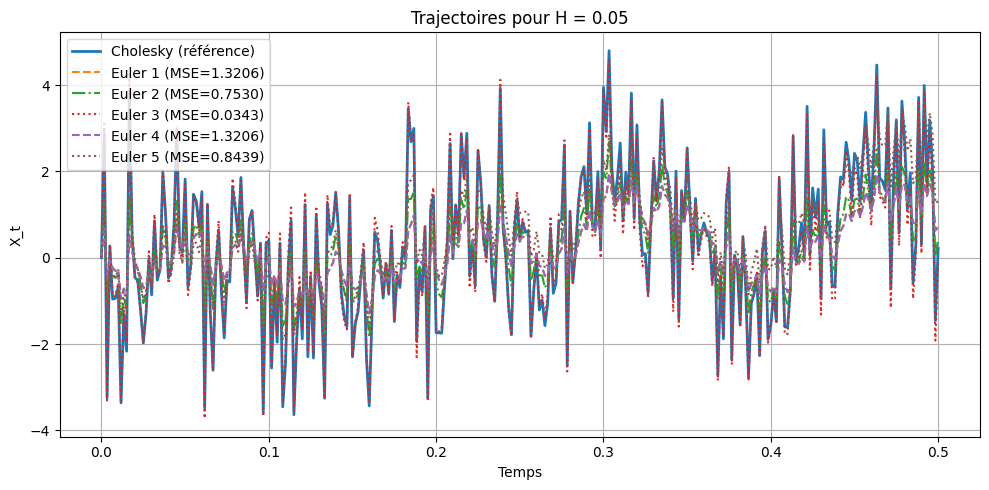

In [ ]:
# Paramètres
T = 0.5
n_steps = 300
n_factors=10
H_values = [0.05]  # Pour inclure des petits et grands H
rng = np.random.default_rng(3)
Z = rng.standard_normal(n_steps)

# Initialisation des résultats
mse_results = {}
execution_times = {}

# Création des graphiques
fig, axe = plt.subplots(1, 1, figsize=(10, 5))

for idx, H in enumerate(H_values):
    # Mesure du temps et simulation pour Cholesky
    execution_time_cholesky = timeit.timeit(lambda: simuler_rl_fbm_cholesky(H, T, n_steps, Z, nu=1), number=10) / 10
    cholesky_path, time = simuler_rl_fbm_cholesky(H, T, n_steps, Z, nu=1)

    # Mesure du temps et simulation pour Euler 1
    execution_time_F_euler1 = timeit.timeit(lambda: Factor_Euler_1(H, n_factors, n_steps, T,Z, nu=1), number=10) / 10
    F_euler1_path = Factor_Euler_1(H, n_factors, n_steps, T,Z, nu=1)

    # Mesure du temps et simulation pour Euler 2
    execution_time_F_euler2 = timeit.timeit(lambda: Factor_Euler_2(H, n_factors, n_steps, T,Z, nu=1), number=10) / 10
    F_euler2_path = Factor_Euler_2(H, n_factors, n_steps, T,Z, nu=1)

    # Mesure du temps et simulation pour Euler 3
    execution_time_F_euler3 = timeit.timeit(lambda: Factor_Euler_3(H, n_factors, n_steps, T,Z, nu=1), number=10) / 10
    F_euler3_path = Factor_Euler_3(H, n_factors, n_steps, T,Z, nu=1)

    # Mesure du temps et simulation pour Euler 4
    execution_time_F_euler4 = timeit.timeit(lambda: Factor_Euler_4(H, n_factors, n_steps, T,Z, nu=1), number=10) / 10
    F_euler4_path = Factor_Euler_4(H, n_factors, n_steps, T,Z, nu=1)

     # Mesure du temps et simulation pour Euler 5_2
    execution_time_F_euler5 = timeit.timeit(lambda: Factor_Euler_5(H, n_factors, n_steps, T,Z, nu=1), number=10) / 10
    F_euler5_path = Factor_Euler_5(H, n_factors, n_steps, T,Z, nu=1)

    # Calcul des MSE
    mse_F_euler1 = compute_mse(cholesky_path, F_euler1_path)
    mse_F_euler2 = compute_mse(cholesky_path, F_euler2_path)
    mse_F_euler3 = compute_mse(cholesky_path, F_euler3_path)
    mse_F_euler4 = compute_mse(cholesky_path, F_euler4_path)
    mse_F_euler5 = compute_mse(cholesky_path, F_euler5_path)




    # Stockage des résultats
    mse_results[H] = {
        'Factor Euler 1': mse_F_euler1,
        'Factor Euler 2': mse_F_euler2,
        'Factor Euler 3': mse_F_euler3,
        'Factor Euler 4': mse_F_euler4,
        'Factor Euler 5': mse_F_euler5

    }
    execution_times[H] = {
        'Cholesky': execution_time_cholesky,
        'Factor Euler 1': execution_time_F_euler1,
        'Factor Euler 2': execution_time_F_euler2,
        'Factor Euler 3': execution_time_F_euler3,
        'Factor Euler 4': execution_time_F_euler4,
        'Factor Euler 5': execution_time_F_euler5
    }

    # Tracé des trajectoires
    axe.plot(time, cholesky_path, label='Cholesky (référence)', linewidth=2)
    axe.plot(time, F_euler1_path, label=f'Euler 1 (MSE={mse_F_euler1:.4f})', linestyle='--')
    axe.plot(time, F_euler2_path, label=f'Euler 2 (MSE={mse_F_euler2:.4f})', linestyle='-.')
    axe.plot(time, F_euler3_path, label=f'Euler 3 (MSE={mse_F_euler3:.4f})', linestyle=':')
    axe.plot(time, F_euler4_path, label=f'Euler 4 (MSE={mse_F_euler4:.4f})', linestyle='dashed')
    axe.plot(time, F_euler5_path, label=f'Euler 5 (MSE={mse_F_euler5:.4f})', linestyle='dotted')

    axe.set_title(f'Trajectoires pour H = {H}')
    axe.set_xlabel('Temps')
    axe.set_ylabel('X_t')
    axe.legend(loc='upper left')
    axe.grid(True)

plt.tight_layout()
plt.show()

Pour $H=0.05$, Les schémas 3 et 4 s'ajustent mieux à la trajectoire de Cholesky. Les schémas 1, 2 et 3 moins bien. \\



<ipython-input-11-2b0d20d8abdc>:37: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  X[t] = X[t - 1] + nu * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))
<ipython-input-12-367f7533b0e2>:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  X[t] = X[t - 1] + nu * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))
<ipython-input-14-45433b25c1a5>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  X[t] = X[t - 1] + nu * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))
<ipython-input-15-b65329f01c50>:43: DeprecationWarning: Calling np.sum(generato

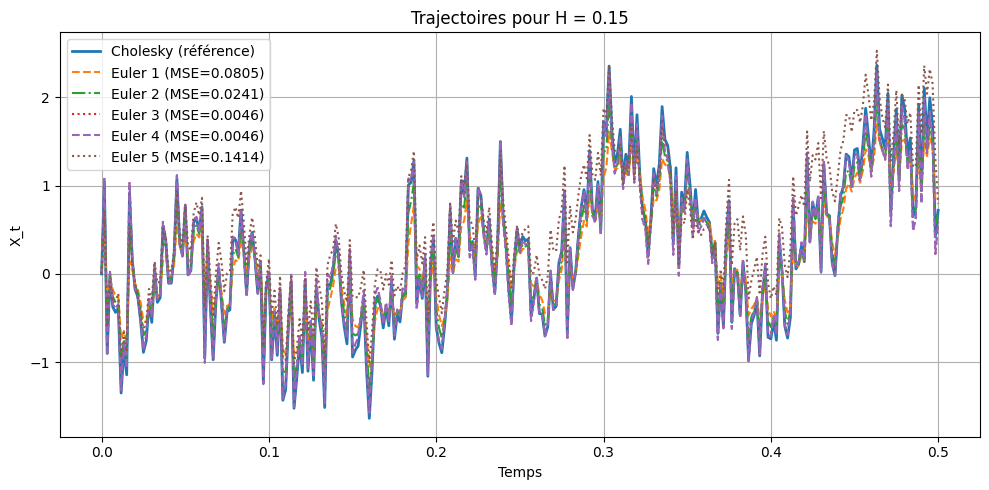

In [ ]:
# Paramètres
T = 0.5
n_steps = 300
n_factors=10
H_values = [0.15]  # Pour inclure des petits et grands H
rng = np.random.default_rng(3)
Z = rng.standard_normal(n_steps)

# Initialisation des résultats
mse_results = {}
execution_times = {}

# Création des graphiques
fig, axe = plt.subplots(1, 1, figsize=(10, 5))

for idx, H in enumerate(H_values):
    # Mesure du temps et simulation pour Cholesky
    execution_time_cholesky = timeit.timeit(lambda: simuler_rl_fbm_cholesky(H, T, n_steps, Z, nu=1), number=10) / 10
    cholesky_path, time = simuler_rl_fbm_cholesky(H, T, n_steps, Z, nu=1)

    # Mesure du temps et simulation pour Euler 1
    execution_time_F_euler1 = timeit.timeit(lambda: Factor_Euler_1(H, n_factors, n_steps, T,Z, nu=1), number=10) / 10
    F_euler1_path = Factor_Euler_1(H, n_factors, n_steps, T,Z, nu=1)

    # Mesure du temps et simulation pour Euler 2
    execution_time_F_euler2 = timeit.timeit(lambda: Factor_Euler_2(H, n_factors, n_steps, T,Z, nu=1), number=10) / 10
    F_euler2_path = Factor_Euler_2(H, n_factors, n_steps, T,Z, nu=1)

    # Mesure du temps et simulation pour Euler 3
    execution_time_F_euler3 = timeit.timeit(lambda: Factor_Euler_3(H, n_factors, n_steps, T,Z, nu=1), number=10) / 10
    F_euler3_path = Factor_Euler_3(H, n_factors, n_steps, T,Z, nu=1)

    # Mesure du temps et simulation pour Euler 4
    execution_time_F_euler4 = timeit.timeit(lambda: Factor_Euler_4(H, n_factors, n_steps, T,Z, nu=1), number=10) / 10
    F_euler4_path = Factor_Euler_4(H, n_factors, n_steps, T,Z, nu=1)

     # Mesure du temps et simulation pour Euler 5_2
    execution_time_F_euler5 = timeit.timeit(lambda: Factor_Euler_5(H, n_factors, n_steps, T,Z, nu=1), number=10) / 10
    F_euler5_path = Factor_Euler_5(H, n_factors, n_steps, T,Z, nu=1)

    # Calcul des MSE
    mse_F_euler1 = compute_mse(cholesky_path, F_euler1_path)
    mse_F_euler2 = compute_mse(cholesky_path, F_euler2_path)
    mse_F_euler3 = compute_mse(cholesky_path, F_euler3_path)
    mse_F_euler4 = compute_mse(cholesky_path, F_euler4_path)
    mse_F_euler5 = compute_mse(cholesky_path, F_euler5_path)




    # Stockage des résultats
    mse_results[H] = {
        'Factor Euler 1': mse_F_euler1,
        'Factor Euler 2': mse_F_euler2,
        'Factor Euler 3': mse_F_euler3,
        'Factor Euler 4': mse_F_euler4,
        'Factor Euler 5': mse_F_euler5

    }
    execution_times[H] = {
        'Cholesky': execution_time_cholesky,
        'Factor Euler 1': execution_time_F_euler1,
        'Factor Euler 2': execution_time_F_euler2,
        'Factor Euler 3': execution_time_F_euler3,
        'Factor Euler 4': execution_time_F_euler4,
        'Factor Euler 5': execution_time_F_euler5
    }

    # Tracé des trajectoires
    axe.plot(time, cholesky_path, label='Cholesky (référence)', linewidth=2)
    axe.plot(time, F_euler1_path, label=f'Euler 1 (MSE={mse_F_euler1:.4f})', linestyle='--')
    axe.plot(time, F_euler2_path, label=f'Euler 2 (MSE={mse_F_euler2:.4f})', linestyle='-.')
    axe.plot(time, F_euler3_path, label=f'Euler 3 (MSE={mse_F_euler3:.4f})', linestyle=':')
    axe.plot(time, F_euler4_path, label=f'Euler 4 (MSE={mse_F_euler4:.4f})', linestyle='dashed')
    axe.plot(time, F_euler5_path, label=f'Euler 5 (MSE={mse_F_euler5:.4f})', linestyle='dotted')

    axe.set_title(f'Trajectoires pour H = {H}')
    axe.set_xlabel('Temps')
    axe.set_ylabel('X_t')
    axe.legend(loc='upper left')
    axe.grid(True)

plt.tight_layout()
plt.show()

Le schéma 5 s'ajuste à nouveau moins bien pour H=0.15

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">4. Going beyond</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> Simulation is not a one-size-fits-all solution. Break free from the mold and discover new methods to solve the problem at hand. </strong></p>


Explain how the above method can be adapted to the shifted kernel  
$$ K_{\epsilon}(t,s) = \frac{1}{\Gamma(H + 1/2)} (\epsilon + t - s)^{H-1/2} 1_{s<t}$$

Notice that now $H\in (-\infty, \infty)$. Why?

Study the impact of $\epsilon>0$ on the schemes. You can make epsilon vary between  $0$ and $1/52$, also for $\epsilon>0$ you can test with $H$ varying between $-1$ and $0.5$

En développant comme à la question 2, on peut montrer que dans ce cas : \\

$$\int_0^T \left| K_n(t) - K_\epsilon(t) \right|^2 dt =
\sum_{i=1}^n c_i^2 \frac{1 - e^{-2x_i T}}{2x_i}
+ 2 \sum_{1 \leq i < j \leq n} c_i c_j \frac{1 - e^{-(x_i + x_j)T}}{x_i + x_j}
- 2 \sum_{i=1}^n \frac{c_i}{\Gamma(H + 1/2)} \int_0^T e^{-x_i t} (\epsilon + t)^{H-1/2} dt
+ \frac{1}{\Gamma^2(H + 1/2)} \frac{(\epsilon + T)^{2H} - \epsilon^{2H}}{2H}.
$$

Par la suite en utilisant les mêmes fonctions d'optimisation et on peut determiner $r_n$ optimal puis simuler les trajectoires suivant les différents schémas factoriels d'Euler.

In [ ]:
# Nouveaux noyaux shiftés

import numpy as np
from scipy.special import gamma, gammainc

def kernel(t, H, epsilon=0):
    """
    Fonction du noyau K(t) pour un paramètre H et un décalage epsilon.
    """
    alpha = H + 0.5
    return (t + epsilon)**(alpha - 1) / gamma(alpha)

def kernel_approx(t, H, r_n, n, epsilon=0):
    """
    Fonction du noyau approché K_n(t) pour un paramètre H, r_n, n facteurs et un décalage epsilon.
    """
    alpha = H + 0.5
    # Calcul des coefficients c_n et des exposants x_n
    c_n = [(r_n**(1-alpha) - 1) * r_n**((alpha-1)*(1 + n/2)) * r_n**((1-alpha)*i) /
           (gamma(alpha) * gamma(1-alpha) * (1-alpha))
           for i in range(1, n+1)]

    x_n = [(1-alpha) * (r_n**(2-alpha) - 1) * r_n**(i-1-n/2) /
           ((2-alpha) * (r_n**(1-alpha) - 1))
           for i in range(1, n+1)]

    # Calcul de la somme du noyau approché avec décalage epsilon
    return sum(c * np.exp(-x * (t + epsilon)) for c, x in zip(c_n, x_n))

def loss_function_with_shift(r_n, T, H, n, epsilon=0):
    """
    Fonction de perte calculant l'erreur quadratique entre K_n(t) et K_epsilon(t).
    """
    alpha = H + 0.5

    # Calcul des coefficients c_n et des exposants x_n
    c_n = [
        (r_n**(1-alpha) - 1) * r_n**((alpha-1)*(1 + n/2)) * r_n**((1-alpha)*i) /
        (gamma(alpha) * gamma(1-alpha) * (1-alpha))
        for i in range(1, n+1)
    ]

    x_n = [
        (1-alpha) * (r_n**(2-alpha) - 1) * r_n**(i-1-n/2) /
        ((2-alpha) * (r_n**(1-alpha) - 1))
        for i in range(1, n+1)
    ]

    # Calcul des termes de l'expression finale
    e1 = sum(c_n[i]**2 * (1 - np.exp(-2 * x_n[i] * T)) / (2 * x_n[i]) for i in range(n)) + \
         2 * sum(c_n[i] * c_n[j] * (1 - np.exp(-(x_n[i] + x_n[j]) * T)) / (x_n[i] + x_n[j])
         for i in range(n) for j in range(i+1, n))

    e2 = -2 * sum(c_n[i] * gammainc(H + 0.5, x_n[i] * T) / (x_n[i]**(H+0.5)) for i in range(n))

    e3 = T**(2 * H) / (2 * H * (gamma(H + 0.5))**2)

    # Calcul de l'expression finale de la fonction de perte
    result = e1 + e2 + e3

    return result


In [ ]:
#Nouvelle fonction d'optimisation

from scipy.optimize import minimize
from functools import partial

def optimal_rn_with_shift(H, T, n, r_0=10, epsilon=0):

    # Fixer les autres paramètres de la fonction de perte
    loss_func_with_shift = partial(loss_function_with_shift, T=T, H=H, n=n, epsilon=epsilon)

    # Optimisation avec l'algorithme Nelder-Mead
    result = minimize(loss_func_with_shift, x0=[r_0], method='Nelder-Mead', tol=1e-10)

    # Retourner le résultat de l'optimisation
    return result.x[0], result.fun



#Fonction pour calculer les coeffs ck et xk issus du nouveau r_n optimal

def compute_coefficients_with_shift(H, n, T, epsilon=0):

    # Calcul de r_n optimal en tenant compte de l'épsilon
    r_n_opt, _ = optimal_rn_with_shift(H, T, n, r_0=10, epsilon=epsilon)

    # Définition de alpha
    alpha = H + 0.5

    # Calcul des coefficients c_n
    c_n = [
        (r_n_opt**(1-alpha) - 1) * r_n_opt**((alpha-1)*(1 + n/2)) * r_n_opt**((1-alpha)*i) /
        (gamma(alpha) * gamma(1-alpha) * (1-alpha))
        for i in range(1, n+1)
    ]

    # Calcul des coefficients x_n
    x_n = [
        (1-alpha) * (r_n_opt**(2-alpha) - 1) * r_n_opt**(i-1-n/2) /
        ((2-alpha) * (r_n_opt**(1-alpha) - 1))
        for i in range(1, n+1)
    ]

    return c_n, x_n


In [ ]:
##Adaptation dans les schemas

from scipy.integrate import quad
import numpy as np

# Schéma Euler 1 avec eps
def Factor_Euler_eps_1(H, n_factors, n_steps, T, Z, eps=1.0):
    r_n = float(optimal_rn(H, T, n_factors, r_0=10)[0][0])

    # Calcul des coefficients
    c_n, x_n = compute_coefficients(H, n_factors)

    # Initialisation
    dt = T / n_steps  # Discrétisation temporelle
    Y = np.zeros((n_factors, n_steps+1))  # Facteurs Y
    X = np.zeros(n_steps+1)  # Processus X
    rng = np.random.default_rng(3)

    # Simulation des trajectoires
    for t in range(1, n_steps+1):
        for k in range(n_factors):  # Boucle sur les facteurs
            # Mise à jour de Y selon Euler 1
            Y[k, t] = np.exp(-x_n[k] * dt) * Y[k, t - 1] + np.exp(-x_n[k] * dt) * np.sqrt(dt) * Z[t-1]

        # Mise à jour de X en utilisant la différence Y_t^k - Y_{t-1}^k
        X[t] = X[t - 1] + eps * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))

    return X


# Schéma Euler 2 avec eps
def Factor_Euler_eps_2(H, n_factors, n_steps, T, Z, eps=1.0):
    r_n = float(optimal_rn(H, T, n_factors, r_0=10)[0][0])

    # Calcul des coefficients
    c_n, x_n = compute_coefficients(H, n_factors)

    # Initialisation
    dt = T / n_steps  # Discrétisation temporelle
    Y = np.zeros((n_factors, n_steps+1))  # Facteurs Y
    X = np.zeros(n_steps+1)  # Processus X
    rng = np.random.default_rng(3)

    # Simulation des trajectoires
    for t in range(1, n_steps+1):
        for k in range(n_factors):  # Boucle sur les facteurs
            # Mise à jour de Y selon Euler 2
            Y[k, t] = np.exp(-x_n[k] * dt) * Y[k, t - 1] + (1 - np.exp(-x_n[k] * dt)) / (x_n[k] * np.sqrt(dt)) * Z[t-1]

        # Mise à jour de X en utilisant la différence Y_t^k - Y_{t-1}^k
        X[t] = X[t - 1] + eps * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))

    return X


# Schéma Euler 3 avec eps
def Factor_Euler_eps_3(H, n_factors, n_steps, T, Z, eps=1.0):
    r_n = float(optimal_rn(H, T, n_factors, r_0=10)[0][0])

    # Calcul des coefficients
    c_n, x_n = compute_coefficients(H, n_factors)

    # Initialisation
    dt = T / n_steps  # Discrétisation temporelle
    Y = np.zeros((n_factors, n_steps+1))  # Facteurs Y
    X = np.zeros(n_steps+1)  # Processus X
    rng = np.random.default_rng(3)

    # Simulation des trajectoires
    for t in range(1, n_steps+1):
        for k in range(n_factors):  # Boucle sur les facteurs
            # Mise à jour de Y selon Euler 3
            exp_term = np.exp(-x_n[k] * dt)
            sqrt_term = np.sqrt((1 - exp_term**2) / (2 * x_n[k]))
            Y[k, t] = exp_term * Y[k, t - 1] + sqrt_term * Z[t-1]

        # Mise à jour de X en utilisant la différence Y_t^k - Y_{t-1}^k
        X[t] = X[t - 1] + eps * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))

    return X


# Schéma Euler 4 avec eps
def Factor_Euler_eps_4(H, n_factors, n_steps, T, Z, eps=1.0):
    r_n = float(optimal_rn(H, T, n_factors, r_0=10)[0][0])

    # Calcul des coefficients
    c_n, x_n = compute_coefficients(H, n_factors)

    # Initialisation
    dt = T / n_steps  # Discrétisation temporelle
    Y = np.zeros((n_factors, n_steps+1))  # Facteurs Y
    X = np.zeros(n_steps+1)  # Processus X
    rng = np.random.default_rng(3)

    # Simulation des trajectoires
    for t in range(1, n_steps+1):
        for k in range(n_factors):  # Boucle sur les facteurs
            # Mise à jour de Y selon Euler 4
            exp_term = np.exp(-x_n[k] * dt)
            sqrt_term = np.sqrt((1 - exp_term**2) / (2 * x_n[k]))
            Y[k, t] = exp_term * Y[k, t - 1] + sqrt_term * Z[t-1]

        # Mise à jour de X en utilisant la différence Y_t^k - Y_{t-1}^k
        X[t] = X[t - 1] + eps * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))

    return X


# Schéma Euler 5 avec eps
def Factor_Euler_eps_5(H, n_factors, n_steps, T, Z, eps=1.0):
    r_n = float(optimal_rn(H, T, n_factors, r_0=10)[0][0])

    # Calcul des coefficients
    c_n, x_n = compute_coefficients(H, n_factors)

    # Initialisation
    dt = T / n_steps  # Discrétisation temporelle
    Y = np.zeros((n_factors, n_steps + 1))  # Facteurs Y
    X = np.zeros(n_steps + 1)  # Processus X
    rng = np.random.default_rng(3)
    time = np.linspace(0, T, n_steps + 1)

    # Fonction noyau K_n avec eps intégré
    def K_n(t, s, eps):
        return np.exp(-r_n * abs(eps + t - s))  # Exemple de noyau exponentiel, modifié par eps

    # Simulation des trajectoires
    for t in range(1, n_steps):
        for k in range(n_factors):  # Boucle sur les facteurs
            # Mise à jour de Y selon Euler 2
            Y[k, t] = np.exp(-x_n[k] * dt) * Y[k, t - 1] + (1 - np.exp(-x_n[k] * dt)) / (x_n[k] * np.sqrt(dt)) * Z[t-1]

        # Calcul des deux termes de variance pour la partie stochastique
        var_1, _ = quad(lambda s: K_n(time[t], s, eps) ** 2, time[t - 1], time[t])
        var_2, _ = quad(lambda s: K_n(time[t + 1], s, eps) ** 2, time[t], time[t + 1])

        # Somme des deux variances
        total_variance = var_1 + var_2

        # Partie bruit (normale avec variance calculée)
        stochastic_term = np.random.normal(0, np.sqrt(total_variance))

        # Mise à jour de X
        X[t] = X[t - 1] + np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors)) + stochastic_term

    # Mise à jour du dernier élément de X après la boucle
    var_1, _ = quad(lambda s: K_n(time[n_steps - 1], s, eps) ** 2, time[n_steps - 2], time[n_steps - 1])
    var_2, _ = quad(lambda s: K_n(time[n_steps], s, eps) ** 2, time[n_steps - 1], time[n_steps])

    total_variance = var_1 + var_2
    stochastic_term = np.random.normal(0, np.sqrt(total_variance))

    X[n_steps] = X[n_steps - 1] + np.sum(c_n[s] * (Y[s, n_steps] - Y[s, n_steps - 1]) for s in range(n_factors)) + stochastic_term

    return X

<ipython-input-21-d4a26c742bcd>:78: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  X[t] = X[t - 1] + eps * np.sum(c_n[s] * (Y[s, t] - Y[s, t - 1]) for s in range(n_factors))


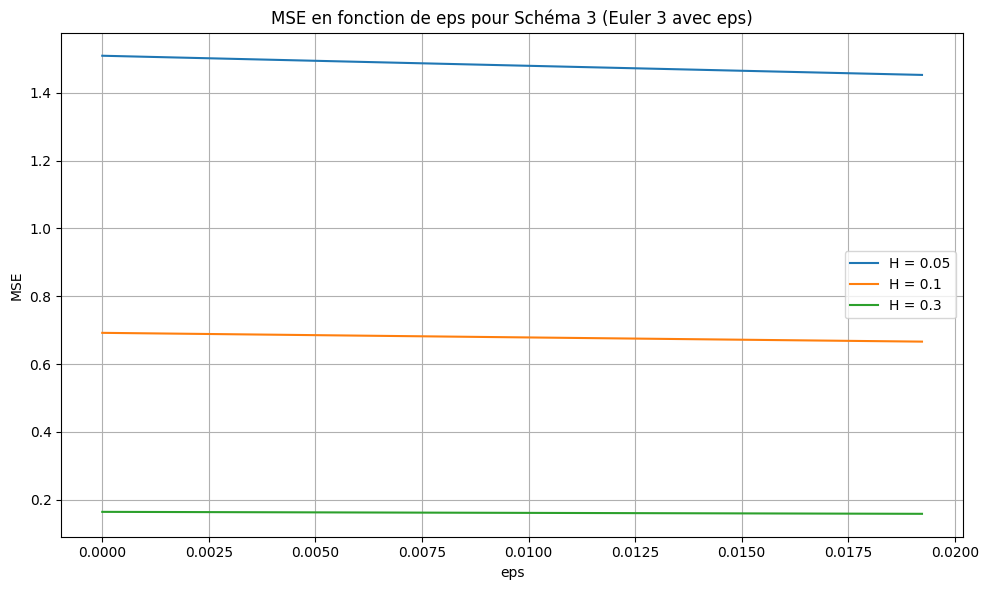

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
T = 0.5
n_steps = 300
n_factors = 10
H_values = [0.05, 0.1, 0.3]  # Valeurs de H pour lesquelles on trace les courbes
eps_values = np.linspace(0, 1/52, 100)  # eps de 0 à 1/52
rng = np.random.default_rng(3)
Z = rng.standard_normal(n_steps)

# Initialisation des résultats
mse_results = np.zeros((len(H_values), len(eps_values)))  # Pour 3 H et 100 eps

# Simulation des trajectoires et calcul des MSE pour le schéma 3 (Euler 3 avec eps)
for i, H in enumerate(H_values):
    for j, eps in enumerate(eps_values):
        # Simulation pour Cholesky avec shift
        cholesky_path = simuler_rl_fbm_cholesky(H, T, n_steps, Z, nu=1)

        # Schéma 3 : Euler 3 avec eps
        F_euler3_path = Factor_Euler_eps_3(H, n_factors, n_steps, T, Z, eps=eps)
        mse_results[i, j] = compute_mse(cholesky_path, F_euler3_path)

# Tracé du graphique pour le schéma 3
plt.figure(figsize=(10, 6))

for i, H in enumerate(H_values):
    plt.plot(eps_values, mse_results[i, :], label=f'H = {H}')

plt.xlabel('eps')
plt.ylabel('MSE')
plt.title('MSE en fonction de eps pour Schéma 3 (Euler 3 avec eps)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Le MSE décroît de plus en plus faiblement avec $\epsilon$ quand $H$ augmente.